In [2]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import load
import pickle

In [3]:
Lat=np.array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
s10_phase=np.array([3.028, 3.077, 3.074, 3.047, 3.059, 3.089, 3.137, 3.097, 3.239, 3.208])
s10_phase_1s=np.array([0.046, 0.067, 0.038, 0.033, 0.046, 0.045, 0.039, 0.055, 0.044, 0.057])
s15_phase=np.array([3.223, 3.191, 3.195, 3.174, 3.214, 3.246, 3.305, 3.263, 3.336, 3.265])
s15_phase_1s=np.array([0.071, 0.065, 0.046, 0.043, 0.047, 0.045, 0.036, 0.045, 0.034, 0.068])

s20_phase=np.array([3.374, 3.375, 3.327, 3.343, 3.364, 3.48, 3.459,3.447, 3.484, 3.499])
s20_phase_1s=np.array([0.021, 0.022, 0.017, 0.01, 0.012, 0.009, 0.009, 0.009,0.011, 0.006])


Mean_S10_phase=np.mean(s10_phase)
Mean_S20_phase=np.mean(s20_phase)
Mean_S15_phase=np.mean(s15_phase)

s32_phase=np.array([3.693, 3.644, 3.616, 3.588, 3.618, 3.718, 3.7, 3.729, 3.76, 3.694])
s32_phase_1s=np.array([0.015, 0.018, 0.015, 0.009, 0.01, 0.008, 0.007, 0.006, 0.007, 0.006])
s40_phase=np.array([3.727, 3.726, 3.728, 3.704, 3.713, 3.794, 3.777, 3.808, 3.851, 3.821])
s40_phase_1s=np.array([0.014, 0.013, 0.012, 0.009, 0.01, 0.008, 0.008, 0.007, 0.008, 0.006])
s50s_phase=np.array([3.829, 3.782, 3.79, 3.8, 3.817, 3.88, 3.864, 3.897, 3.943, 3.922])
s50s_phase_1s=np.array([0.019, 0.018, 0.017, 0.01, 0.013, 0.009, 0.007, 0.007, 0.009, 0.008])

Av_heat_flow=np.array([62.3, 83.9, 86.5, 86.7, 83.6, 74.9, 57.8, 58.7, 62.1, 75.5])


In [4]:

with open('Combo_Amp.pkl', 'rb') as f:
        Combo_Amp=load(f)
with open('Combo_Cpx.pkl', 'rb') as f:
        Combo_Cpx=load(f)
           

In [7]:
Combo_Cpx_Amp=pd.concat([Combo_Amp, Combo_Cpx], axis=0).reset_index()
Combo_Cpx_Amp['Preferred_P']

0       2.650384
1       2.589812
2       3.214705
3       2.078537
4       3.259962
          ...   
4666    0.969567
4667    0.755831
4668    1.037630
4669    1.724274
4670    2.442137
Name: Preferred_P, Length: 4671, dtype: float64

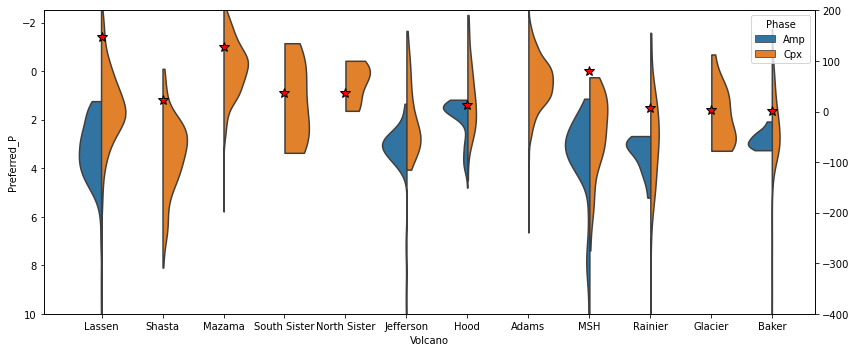

In [8]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(12,5), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Lassen', 'Shasta', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=["Lassen", "Shasta", "Mazama", "South Sister", "North Sister",
            "Jefferson", "Hood", "Adams", "MSH", "Rainier", "Glacier", "Baker"]
sns.violinplot(x="Volcano", y="Preferred_P", hue="Phase", cut=0, inner=None,
            data=Combo_Cpx_Amp, split=True, ax=ax1, order=volc_order)
ax2.plot(0, 26+1+120, '*k', ms=10, mfc='red') # Lassen heat flow from Ingebristen
ax2.plot(1, 18+5, '*k', ms=10, mfc='red') # Shasta heat flow from Ingebristen
ax2.plot(2, 30+97, '*k', ms=10, mfc='red') #  Crater Lake heat flow from Ingebristen
ax2.plot(3, 20+16, '*k', ms=10, mfc='red') # Three Sisters heat flow from Ingebristen
ax2.plot(4, 20+16, '*k', ms=10, mfc='red') # Three Sisters heat flow from Ingebristen
#ax2.plot(5, 20+16, '*k', ms=10, mfc='red') # No data jefferson specifically
ax2.plot(6, 3+10, '*k', ms=10, mfc='red') # Hood heat flow from Ingebristen
#ax2.plot(7, 3+10, '*k', ms=10, mfc='red') # Adams heat flow from Ingebristen
ax2.plot(8, 80, '*k', ms=10, mfc='red') # MSH heat flow from Ingebristen
ax2.plot(9, 7, '*k', ms=10, mfc='red') # Rainier heat flow from Ingebristen
ax2.plot(10, 4, '*k', ms=10, mfc='red') # Glacier heat flow from Ingebristen
ax2.plot(11, 1, '*k', ms=10, mfc='red') # Baker heat flow from Ingebristen

# (y=Hood_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax6, color="lightblue", linewidth=1, 
#                    linecolor='r')
ytext=15
#plt.text(40.654342, ytext, "Lassen", size='small')

ax1.set_ylim([-2.5, 10])
ax2.set_ylim([-400, 200])
ax1.invert_yaxis()
fig.tight_layout()

In [9]:
plt.hist(Combo_Cpx_Amp['Preferred_D'].loc[Combo_Cpx_Amp['Phase']=="Cpx"], density=True)
plt.hist(Combo_Cpx_Amp['Preferred_D'].loc[Combo_Cpx_Amp['Phase']=="Amp"], density=True, alpha=0.5)

KeyError: 'Preferred_D'

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,5), sharey=True)

for uniq in Combo_Cpx['Latitude'].unique():
    ax1.plot(np.nanmedian(Combo_Cpx['Latitude'].loc[Combo_Cpx['Latitude']==uniq]),
             np.nanmedian(Combo_Cpx['P_Wang21_eq1'].loc[Combo_Cpx['Latitude']==uniq]),
          'ok')
    ax1.errorbar(np.nanmedian(Combo_Cpx['Latitude'].loc[Combo_Cpx['Latitude']==uniq]),
             np.nanmedian(Combo_Cpx['P_Wang21_eq1'].loc[Combo_Cpx['Latitude']==uniq]),
                 xerr=np.nanstd(Combo_Cpx['Latitude'].loc[Combo_Cpx['Latitude']==uniq]) ,
                 yerr=np.nanstd(Combo_Cpx['P_Wang21_eq1'].loc[Combo_Cpx['Latitude']==uniq]) ,
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k')   
# ax1.plot(Combo_Cpx_Amp['Latitude'].loc[Combo_Cpx_Amp['Phase']=="Cpx"],
#          -Combo_Cpx_Amp['Preferred_D'].loc[Combo_Cpx_Amp['Phase']=="Cpx"],
#           'ok')
plt.gca().invert_yaxis()
ax2=ax1.twinx()
ax2.plot(Lat, Av_heat_flow, '-r')



for uniq in Combo_Amp['Latitude'].unique():
    ax1.plot(np.nanmedian(Combo_Amp['Latitude'].loc[Combo_Amp['Latitude']==uniq]),
             np.nanmedian(Combo_Amp['P_kbar_calc'].loc[Combo_Amp['Latitude']==uniq]),
          'ok')
    ax1.errorbar(np.nanmedian(Combo_Amp['Latitude'].loc[Combo_Amp['Latitude']==uniq]),
             np.nanmedian(Combo_Amp['P_kbar_calc'].loc[Combo_Amp['Latitude']==uniq]),
                 xerr=np.nanstd(Combo_Amp['Latitude'].loc[Combo_Amp['Latitude']==uniq]) ,
                 yerr=np.nanstd(Combo_Amp['P_kbar_calc'].loc[Combo_Amp['Latitude']==uniq]) ,
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')   
# ax1.plot(Combo_Amp_Amp['Latitude'].loc[Combo_Amp_Amp['Phase']=="Cpx"],
#          -Combo_Amp_Amp['Preferred_D'].loc[Combo_Amp_Amp['Phase']=="Cpx"],
#           'ok')


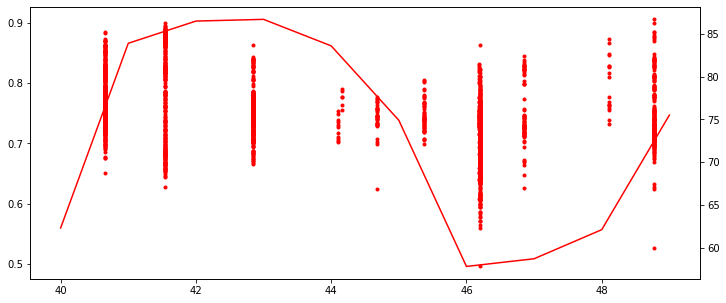

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,5), sharey=True)

ax1.plot(Combo_Cpx['Latitude'],Combo_Cpx['Mgno_Cpx'], '.r')
ax2=ax1.twinx()
ax2.plot(Lat, Av_heat_flow, '-r')

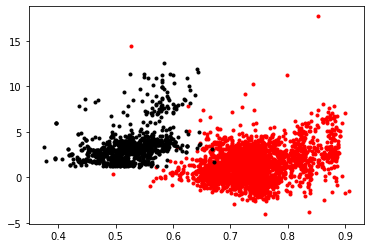

In [11]:
plt.plot(Combo_Cpx['Mgno_Cpx'], Combo_Cpx['P_Wang21_eq1'], '.r')
plt.plot((Combo_Amp['MgO_Amp']/40.3044)/((Combo_Amp['MgO_Amp']/40.3044)+(Combo_Amp['FeOt_Amp']/40.3044)),
                                         
                                         Combo_Amp['P_kbar_calc'], '.k')

Text(0, 0.5, 'Cr2O3 Cpx')

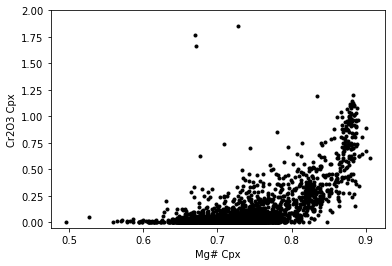

In [12]:
plt.plot(Combo_Cpx['Mgno_Cpx'],Combo_Cpx['Cr2O3_Cpx'],  '.k')
plt.ylim([-0.05, 2])
plt.xlabel('Mg# Cpx')
plt.ylabel('Cr2O3 Cpx')

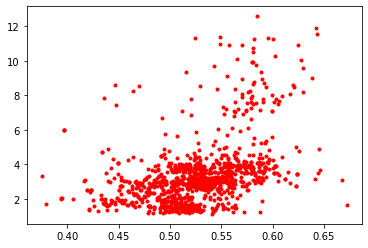

In [13]:
plt.plot((Combo_Amp['MgO_Amp']/40.3044)/((Combo_Amp['MgO_Amp']/40.3044)+(Combo_Amp['FeOt_Amp']/40.3044)),
                                         
                                         Combo_Amp['P_kbar_calc'], '.r')

## Depth instead of pressure to compare to Geophysics

In [14]:
100*10/(2.7*9.8)

37.792894935752074

In [15]:
Combo_Cpx_Amp['Preferred_D']=100*Combo_Cpx_Amp['Preferred_P']/(2.7*9.8)

(-0.5, 11.5)

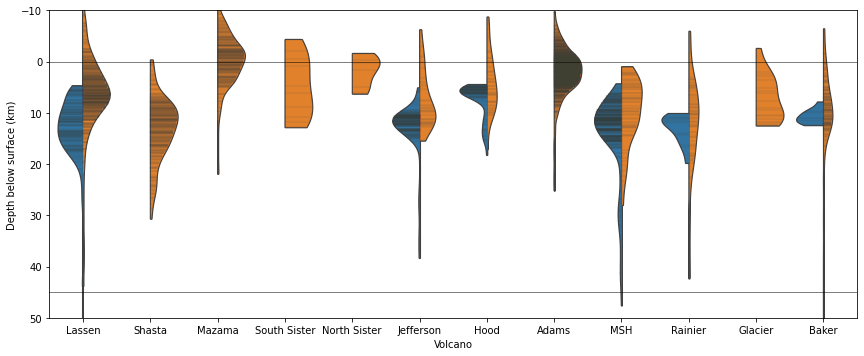

In [16]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,5), sharey=True)

volc_order=["Lassen", "Shasta", "Mazama", "South Sister", "North Sister",
            "Jefferson", "Hood", "Adams", "MSH", "Rainier", "Glacier", "Baker"]
sns.violinplot(x="Volcano", y="Preferred_D", hue="Phase", cut=0, inner=None,
            data=Combo_Cpx_Amp, split=True, ax=ax1, order=volc_order, alpha=0.6, linewidth=2)
sns.violinplot(x="Volcano", y="Preferred_D", hue="Phase", cut=0, inner="stick",
            data=Combo_Cpx_Amp, split=True, ax=ax1, order=volc_order, alpha=0.6, linewidth=0.3)

fig.tight_layout()
ax1.set_ylabel('Depth below surface (km)')
ax1.legend([],[], frameon=False)
ax1.plot([-1, 11.5], [0, 0], '-k', linewidth=0.5)
ax1.plot([-1, 11.5], [45, 45], '-k', linewidth=0.5)
ax1.set_ylim([-10, 50])
ax1.invert_yaxis()
ax1.set_xlim([-0.5, 11.5])

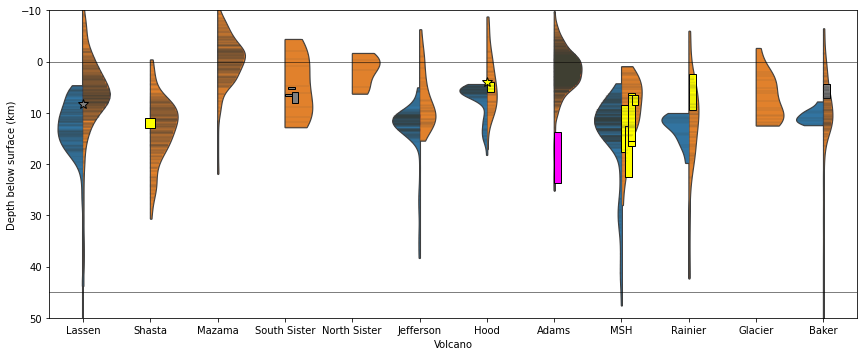

In [17]:
import matplotlib.patches as patches
width=0.1
Combo_Cpx_Amp['Preferred_D']=100*Combo_Cpx_Amp['Preferred_P']/(2.7*9.8)
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(12,5), sharey=True)

volc_order=["Lassen", "Shasta", "Mazama", "South Sister", "North Sister",
            "Jefferson", "Hood", "Adams", "MSH", "Rainier", "Glacier", "Baker"]

sns.violinplot(x="Volcano", y="Preferred_D", hue="Phase", cut=0, inner=None,
            data=Combo_Cpx_Amp, split=True, ax=ax1, order=volc_order, alpha=0.6, linewidth=2)
sns.violinplot(x="Volcano", y="Preferred_D", hue="Phase", cut=0, inner="stick",
            data=Combo_Cpx_Amp, split=True, ax=ax1, order=volc_order, alpha=0.6, linewidth=0.3)

# Speculative - stars, seismics=yellow, geodetics=grey, MT =pink
ax1.plot(0, 8.3, '*k', ms=10, mfc='grey') # Lassen, regional deformation, Parker et al. 2016

ax1.plot(1, 12, 'sk', ms=10, mfc='yellow') # Shasta, Thurber et al. 2009, Seismics, P wave inversion
# No Crater Lake Data
# Three Sisters
rect_3S1 = patches.Rectangle((3, (6.5-0.2)), width, (0.4), linewidth=1,
                             edgecolor='k',facecolor='grey', 
                             alpha=1) # Three Sisters, Wicks et al. 2002, Geodetics
ax1.add_patch(rect_3S1)

rect_3S2 = patches.Rectangle((3.05, (4.9)), width, (5.4-4.9), linewidth=1,
                             edgecolor='k',facecolor='grey', 
                             alpha=1) # Three Sisters, Dzurisin 2009, Geodetics
ax1.add_patch(rect_3S2)

rect_3S3 = patches.Rectangle((3.1, (6)), width, (8-6), linewidth=1,
                             edgecolor='k',facecolor='grey', 
                              alpha=1) # Three Sisters, Riddick and Schmidt2011 Geodetics
ax1.add_patch(rect_3S3)

# No Jefferson data
# Hood
rect_Hood = patches.Rectangle((6, (4)), width, (6-4), linewidth=1,
                             edgecolor='k',facecolor='yellow', 
                             label="Seismics (range rep.)", alpha=1) # Three Sisters, Riddick and Schmidt2011 Geodetics
ax1.add_patch(rect_Hood)
ax1.plot(6, 4, '*k', ms=10, mfc='yellow') # Hood, Jones and Malone, 2005, p wave speculative zone.
# Adams
rect_ad1 = patches.Rectangle((7, (13.74)), width, (23.743-13.74), linewidth=1,
                             edgecolor='k',facecolor='magenta', 
                              alpha=1)
ax1.add_patch(rect_ad1)



# MSH
rect_MSH1 = patches.Rectangle((8, (8.55)), width, (17.549-8.55), linewidth=1,
                             edgecolor='k',facecolor='yellow', 
                              alpha=1) #Ulberg et al. 2020, P and S
ax1.add_patch(rect_MSH1)
rect_MSH2 = patches.Rectangle((8+0.05, (12.55)), width, (22.549-12.55), linewidth=1,
                             edgecolor='k',facecolor='yellow', 
                              alpha=1) #Ulberg et al. 2020, P and S
ax1.add_patch(rect_MSH2)
rect_MSH2 = patches.Rectangle((8+0.05, (12.55)), width, (22.549-12.55), linewidth=1,
                             edgecolor='k',facecolor='yellow', 
                              alpha=1) #Ulberg et al. 2020, P and S
ax1.add_patch(rect_MSH2)

rect_MSH3 = patches.Rectangle((8+0.1, (6.05)), width, (16.549-6.05), linewidth=1,
                             edgecolor='k',facecolor='yellow', 
                              alpha=1) #Kiser 2018
ax1.add_patch(rect_MSH3)

rect_MSH4 = patches.Rectangle((8+0.1, (6.55)), width, (15.549-6.55), linewidth=1,
                             edgecolor='k',facecolor='yellow', 
                              alpha=1) #Kiser 2018
ax1.add_patch(rect_MSH4)

rect_MSH5= patches.Rectangle((8+0.15, (6.55)), width, (8.549-6.55), linewidth=1,
                             edgecolor='k',facecolor='yellow', 
                              alpha=1) #Kiser 2018, highest melt fraction
ax1.add_patch(rect_MSH5)

# Mount Ranier
rect_Ran = patches.Rectangle((9, (2.50)), width, (9.50-2.50), linewidth=1,
                             edgecolor='k',facecolor='yellow', 
                              alpha=1) # Flinders and Shen 2017
ax1.add_patch(rect_Ran)

rect_Bak = patches.Rectangle((11, (4.30)), width, (7.1-4.30), linewidth=1,
                             edgecolor='k',facecolor='grey', 
                              alpha=1) # Hodge and crider, 2010
ax1.add_patch(rect_Bak)
# ax2.plot(1, 18+5, '*k', ms=10, mfc='red') # Shasta heat flow from Ingebristen
# ax2.plot(2, 30+97, '*k', ms=10, mfc='red') #  Crater Lake heat flow from Ingebristen
# ax2.plot(3, 20+16, '*k', ms=10, mfc='red') # Three Sisters heat flow from Ingebristen
# ax2.plot(4, 20+16, '*k', ms=10, mfc='red') # Three Sisters heat flow from Ingebristen
# #ax2.plot(5, 20+16, '*k', ms=10, mfc='red') # No data jefferson specifically
# ax2.plot(6, 3+10, '*k', ms=10, mfc='red') # Hood heat flow from Ingebristen
# #ax2.plot(7, 3+10, '*k', ms=10, mfc='red') # Adams heat flow from Ingebristen
# ax2.plot(8, 80, '*k', ms=10, mfc='red') # MSH heat flow from Ingebristen
# ax2.plot(9, 7, '*k', ms=10, mfc='red') # Rainier heat flow from Ingebristen
# ax2.plot(10, 4, '*k', ms=10, mfc='red') # Glacier heat flow from Ingebristen
# ax2.plot(11, 1, '*k', ms=10, mfc='red') # Baker heat flow from Ingebristen

# (y=Hood_cpx_Press_All[Pequation], inner="stick", cut=0, ax=ax6, color="lightblue", linewidth=1, 
#                    linecolor='r')
ytext=15
#plt.text(40.654342, ytext, "Lassen", size='small')
fig.tight_layout()
ax1.set_ylabel('Depth below surface (km)')
ax1.legend([],[], frameon=False)
ax1.plot([-1, 11.5], [0, 0], '-k', linewidth=0.5)
ax1.plot([-1, 11.5], [45, 45], '-k', linewidth=0.5)
ax1.set_ylim([-10, 50])
ax1.invert_yaxis()
ax1.set_xlim([-0.5, 11.5])


fig.savefig('MineralMelt_Geophysics.png', dpi=300)

## Correlation with chemistry

In [18]:
Combo_Cpx.head()

,P_Wang21_eq1,T_Wang21_eq2,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,P_Put_Teq32d_Peq32a,P_Put_Teq32d_Peq32b,...,T_Put_Teq32d_subsol_Peq32a,T_Put_Teq32d_subsol_Peq32b,P_Put_Teq32d_subsol_Peq32a,P_Put_Teq32d_subsol_Peq32b,P_Jorgenson22,Latitude,Volcano,Phase,Preferred_P,Preferred_P2
0,2.517872,1456.687076,1350.223333,1421.290000,1.799002,1461.901365,1455.596842,2.498804,3.414687,2.661912,...,1224.989344,1176.469637,4.025848,-1.017754,2.961366,48.7767,Baker,Cpx,2.517872,2.961366
1,1.705477,1460.945299,1359.043333,1440.481111,1.471578,1438.978968,1442.018975,2.171644,0.605647,0.968479,...,1178.732588,1126.131910,4.008944,-1.672691,3.236736,48.7767,Baker,Cpx,1.705477,3.236736
2,0.073163,1387.467416,1368.614444,1380.090000,1.441304,1386.148579,1374.458209,1.506584,-0.346414,-1.786835,...,1267.297120,1227.001356,0.449551,-3.485624,0.602960,48.7767,Baker,Cpx,0.073163,0.602960
3,0.644088,1431.222749,1294.421111,1405.456667,1.138762,1435.385873,1436.421659,2.041309,1.140302,1.264621,...,1209.682345,1163.685221,3.087471,-1.718732,1.651684,48.7767,Baker,Cpx,0.644088,1.651684
4,0.058494,1410.391090,1326.328889,1403.333333,1.032220,1412.363304,1421.255077,1.875191,0.003823,1.081286,...,1198.712031,1157.594747,2.922400,-1.407568,1.033955,48.7767,Baker,Cpx,0.058494,1.033955


'0.08'

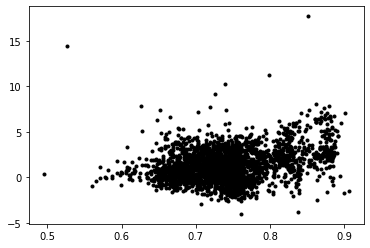

In [19]:
plt.plot(Combo_Cpx['Mgno_Cpx'], Combo_Cpx['P_Wang21_eq1'], '.k')
lowP=Combo_Cpx['P_Wang21_eq1']<15
stats=pt.calculate_R2(Combo_Cpx['Mgno_Cpx'], Combo_Cpx['P_Wang21_eq1'])
stats['R2']

In [15]:
calc_melt=pt.calculate_amp_only_melt_comps(amp_comps=Combo_Amp)

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:2252: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm_cations['Sum_input'] = myAmps1_label.sum(axis='columns')
c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:229: UserWarning: You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)
  w.warn('You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)')


(50.0, 85.0)

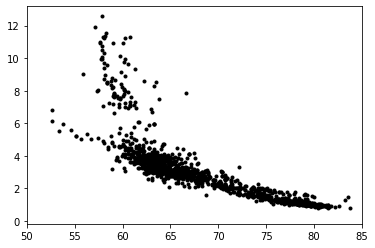

In [16]:
plt.plot(calc_melt['SiO2_Eq1_Zhang17'], Combo_Amp['Preferred_P'], '.k')
plt.xlim([50, 85])

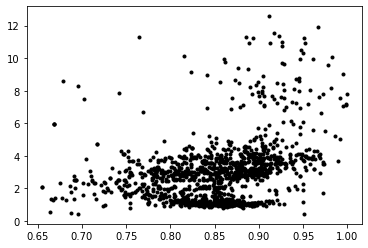

In [17]:
plt.plot(Combo_Amp['Mgno_Fe2'], Combo_Amp['Preferred_P'], '.k')

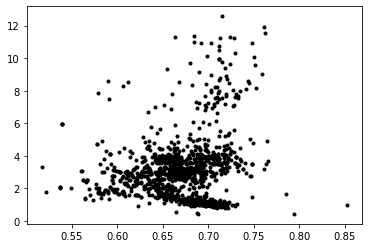

In [18]:
plt.plot(Combo_Amp['Mgno_FeT'], Combo_Amp['Preferred_P'], '.k')

In [19]:
HhighMg_Amp=Combo_Amp.loc[Combo_Amp['Mgno_FeT'].between(0.74, 0.84)]
P_Kraw=pt.calculate_amp_only_press(amp_comps=HhighMg_Amp, equationP="P_Kraw2012", deltaNNO=0)

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:377: UserWarning: This barometer gives the PH2O for the first appearance of amphibole. It should only be applied to the highest Mg# in each sample suite. Note, if there is CO2 in the system P=/ PH2O
  w.warn('This barometer gives the PH2O for the first appearance of'


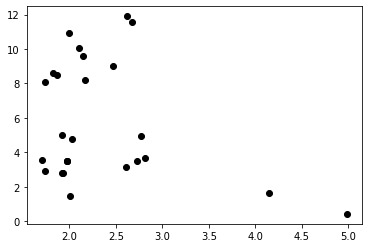

In [20]:
plt.plot(P_Kraw['PH2O_kbar_calc'], HhighMg_Amp['Preferred_P'], 'ok')

In [21]:
Combo_Amp['SiO2_Amp']

0       43.300000
1       42.600000
2       42.100000
3       44.200000
4       42.200000
          ...    
2001    43.237458
2002    50.756456
2003    50.704634
2004    48.867049
2005    43.942400
Name: SiO2_Amp, Length: 2006, dtype: float64